<a href="https://www.kaggle.com/code/i200605salehahmad/heart-attack-prediction-training-multiple-models?scriptVersionId=131127591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Saleh Ahmad
# i200605@nu.edu.pk

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [15]:
DF = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Range Normalize if Min and Max of column is not in range 0-1

In [16]:
def RangeNormalize(Val,Min,Max):
    #Set Minimum to 0.1 and Max to 1.1
    return (Val-Min)/(Max-Min)*0.9+0.1

for idx,ColumnName in enumerate(DF.columns):
    if (ColumnName not in ['output','sex','exng','ca','fbs','restecg','cp']) and (np.min(DF[ColumnName])<0 or np.max(DF[ColumnName])>1):
        DF[ColumnName] = DF[ColumnName].apply(lambda x: RangeNormalize(x,np.min(DF[ColumnName]),np.max(DF[ColumnName])))

In [17]:
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.73750,1,3,0.533019,0.319863,1,0,0.642748,0,0.433871,0.10,0.100,0.4,1
1,0.25000,1,2,0.405660,0.354795,0,1,0.896947,0,0.608065,0.10,0.100,0.7,1
2,0.32500,0,1,0.405660,0.260274,0,0,0.793893,0,0.303226,1.00,0.100,0.7,1
3,0.60625,1,1,0.320755,0.326027,0,1,0.835115,0,0.216129,1.00,0.100,0.7,1
4,0.62500,0,0,0.320755,0.568493,0,1,0.732061,1,0.187097,1.00,0.100,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.62500,0,0,0.490566,0.336301,0,1,0.457252,1,0.129032,0.55,0.100,1.0,0
299,0.40000,1,3,0.235849,0.383562,0,1,0.519084,0,0.274194,0.55,0.100,1.0,0
300,0.83125,1,0,0.524528,0.237671,1,1,0.580916,0,0.593548,0.55,0.550,1.0,0
301,0.62500,1,0,0.405660,0.110274,0,1,0.402290,1,0.274194,0.55,0.325,1.0,0


# Correlation Matrix

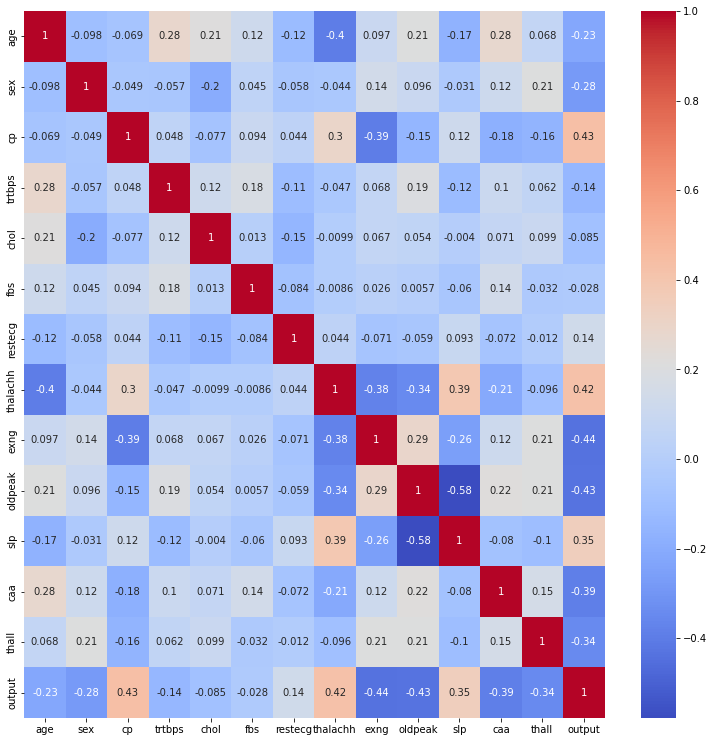

In [18]:
Corr_Matrix = DF.corr()
plt.figure(figsize=(13,13))
sns.heatmap(Corr_Matrix,annot=True,cmap='coolwarm')
plt.show()

In [19]:
Corr_With_Output = Corr_Matrix['output']
print('Corr_With_Output\n',Corr_With_Output.sort_values(ascending=False))

Corr_With_Output
 output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


In [20]:
DF = DF.drop('thalachh',axis=1)
'''
thalachh = Maximum heart rate achieved
Dropping this feature because it has a high correlation with output and logically in a heart attack the heart rate will be low not high
so assuming that this feature is not useful
'''

'\nthalachh = Maximum heart rate achieved\nDropping this feature because it has a high correlation with output and logically in a heart attack the heart rate will be low not high\nso assuming that this feature is not useful\n'

In [21]:
DF

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall,output
0,0.73750,1,3,0.533019,0.319863,1,0,0,0.433871,0.10,0.100,0.4,1
1,0.25000,1,2,0.405660,0.354795,0,1,0,0.608065,0.10,0.100,0.7,1
2,0.32500,0,1,0.405660,0.260274,0,0,0,0.303226,1.00,0.100,0.7,1
3,0.60625,1,1,0.320755,0.326027,0,1,0,0.216129,1.00,0.100,0.7,1
4,0.62500,0,0,0.320755,0.568493,0,1,1,0.187097,1.00,0.100,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.62500,0,0,0.490566,0.336301,0,1,1,0.129032,0.55,0.100,1.0,0
299,0.40000,1,3,0.235849,0.383562,0,1,0,0.274194,0.55,0.100,1.0,0
300,0.83125,1,0,0.524528,0.237671,1,1,0,0.593548,0.55,0.550,1.0,0
301,0.62500,1,0,0.405660,0.110274,0,1,1,0.274194,0.55,0.325,1.0,0


# Model Training and Testing 

In [22]:
def Train_Test(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)*100, f1_score(y_test,y_pred,average='macro')*100, confusion_matrix(y_test,y_pred), classification_report(y_test,y_pred)

AllModels = [KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(),
 GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), MLPClassifier(), XGBClassifier(), XGBRFClassifier(), LGBMClassifier(), CatBoostClassifier(),
 BaggingClassifier(), ExtraTreesClassifier(), StackingClassifier(estimators=[('KNN',KNeighborsClassifier()),('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier())])]

xtrain, xtest, ytrain, ytest = train_test_split(DF.drop('output',axis=1),DF['output'],test_size=0.2,random_state=42)

BestModel = []
for model in AllModels:
    BestModel.append(Train_Test(model,xtrain,xtest,ytrain,ytest))

BestModelDF = pd.DataFrame(BestModel,columns=['Accuracy','F1 Score','Confusion Matrix','Classification Report'],
                           index=['KNeighborsClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','DecisionTreeClassifier','LogisticRegression','SVC',
                                  'GaussianNB','MultinomialNB','BernoulliNB','ComplementNB','MLPClassifier','XGBClassifier','XGBRFClassifier','LGBMClassifier','CatBoostClassifier',
                                  'BaggingClassifier','ExtraTreesClassifier','StackingClassifier'])
BestModelDF = BestModelDF.sort_values(by=['Accuracy','F1 Score'],ascending=False)
BestModelDF

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Learning rate set to 0.005621
0:	learn: 0.6887503	total: 1.1ms	remaining: 1.1s
1:	learn: 0.6847021	total: 1.72ms	remaining: 856ms
2:	learn: 0.6817665	total: 2.07ms	remaining: 689ms
3:	learn: 0.6786370	total: 2.46ms	remaining: 613ms
4:	learn: 0.6740179	total: 2.91ms	remaining: 580ms
5:	learn: 0.6704658	total: 3.31ms	remaining: 549ms
6:	learn: 0.6662527	total: 3.76ms	remaining: 533ms
7:	learn: 0.6628572	total: 4.22ms	remaining: 524ms
8:	learn: 0.6594067	total: 4.65ms	remaining: 512ms
9:	learn: 0.6549035	total: 5.09ms	remaining: 504ms
10:	learn: 0.6506014	total: 5.53ms	remaining: 497ms
11:	learn: 0.6465111	total: 5.96ms	remaining: 491ms
12:	learn: 0.6428434	total: 6.38ms	remaining: 485ms
13:	learn: 0.6386727	total: 6.83ms	remaining: 481ms
14:	learn: 0.6353441	total: 7.24ms	remaining: 476ms
15:	learn: 0.6312778	total: 7.69ms	remaining: 473ms
16:	learn: 0.6272196	total: 8.1ms	remaining: 468ms
17:	learn: 0.6241251	total: 8.42ms	remaining: 459ms
18:	learn: 0.6198931	total: 8.86ms	remaining: 4

,Accuracy,F1 Score,Confusion Matrix,Classification Report
SVC,86.885246,86.853448,"[[25, 4], [4, 28]]",precision recall f1-score ...
StackingClassifier,86.885246,86.853448,"[[25, 4], [4, 28]]",precision recall f1-score ...
LogisticRegression,85.245902,85.245902,"[[26, 3], [6, 26]]",precision recall f1-score ...
MLPClassifier,85.245902,85.245902,"[[26, 3], [6, 26]]",precision recall f1-score ...
ExtraTreesClassifier,85.245902,85.230024,"[[25, 4], [5, 27]]",precision recall f1-score ...
CatBoostClassifier,85.245902,85.182186,"[[24, 5], [4, 28]]",precision recall f1-score ...
KNeighborsClassifier,83.606557,83.602151,"[[25, 4], [6, 26]]",precision recall f1-score ...
MultinomialNB,83.606557,83.602151,"[[26, 3], [7, 25]]",precision recall f1-score ...
ComplementNB,83.606557,83.602151,"[[26, 3], [7, 25]]",precision recall f1-score ...
XGBClassifier,83.606557,83.602151,"[[25, 4], [6, 26]]",precision recall f1-score ...


Best Model Name:  SVC
Accuracy:  86.88524590163934
F1 Score:  86.85344827586206


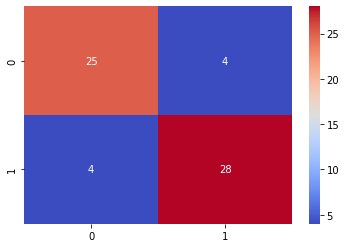

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [23]:
# Displaying the best model results
print('Best Model Name: ',BestModelDF.index[0])
Acc , F1 , CM , CR = BestModelDF.iloc[0]
print('Accuracy: ',Acc)
print('F1 Score: ',F1)
sns.heatmap(CM,annot=True,cmap='coolwarm')
plt.show()
print('Classification Report:\n',CR)